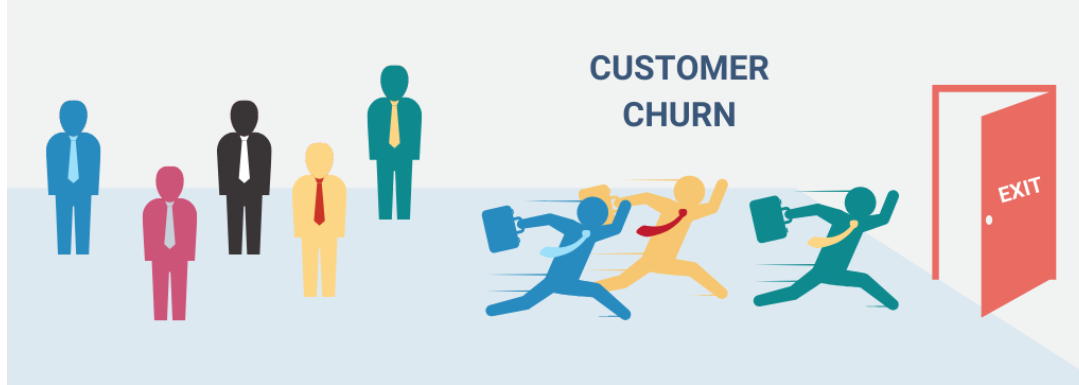

# **Data Description**

* customerID: A unique identifier for each customer.

* gender: The gender of the customer (Male/Female).

* SeniorCitizen: Indicates whether the customer is a senior citizen (1: Yes, 0: No).

* Partner: Indicates whether the customer has a partner (Yes/No).

* Dependents: Indicates whether the customer has dependents (Yes/No).

* tenure: The number of months the customer has been with the company.

* PhoneService: Indicates whether the customer has phone service (Yes/No).

* MultipleLines: Indicates whether the customer has multiple lines (Yes/No).

* InternetService: The type of internet service the customer has (DSL/Fiber optic/No).

* OnlineSecurity: Indicates whether the customer has online security (Yes/No).

* OnlineBackup: Indicates whether the customer has online backup service (Yes/No).

* DeviceProtection: Indicates whether the customer has device protection (Yes/No).

* TechSupport: Indicates whether the customer has tech support service (Yes/No).

* StreamingTV: Indicates whether the customer has streaming TV service (Yes/No).

* StreamingMovies: Indicates whether the customer has streaming movies service (Yes/No).

* Contract: The type of contract the customer has (Month-to-month/One year/Two year).

* PaperlessBilling: Indicates whether the customer has paperless billing (Yes/No).

* PaymentMethod: The method the customer uses to pay (Electronic check/Mailed check/Bank transfer/credit card).

* MonthlyCharges: The amount charged to the customer each month.

* TotalCharges: The total amount charged to the customer during their tenure.

* Churn: Indicates whether the customer has churned (1: Yes, 0: No).

# **Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score,roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

# **Importing the Data**

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Exploration**

## **Understand the Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


* **Total Charges** feature contains numerical values but is currently stored as a string datatype.

## **Check Missing Values**

In [9]:
#Check for Missing and Blank Values
print(" Null Values Count per Column:")
print(df.isnull().sum())
print("="*40)

print(" Blank String Count per Column:")
print((df == " ").sum())
print("="*40)

 Null Values Count per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
 Blank String Count per Column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Ch

## **Check Duplicates**

In [10]:
print("Number of Duplicates:",df.duplicated().sum())

Number of Duplicates: 0


## **Check Outliers**

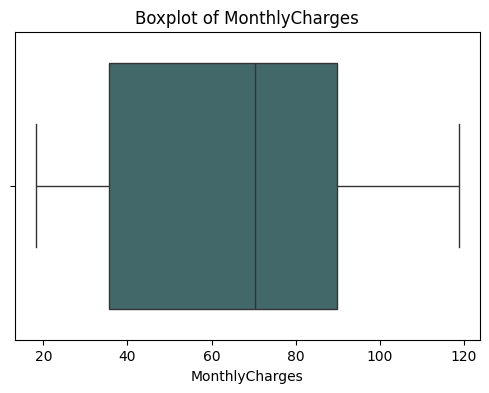

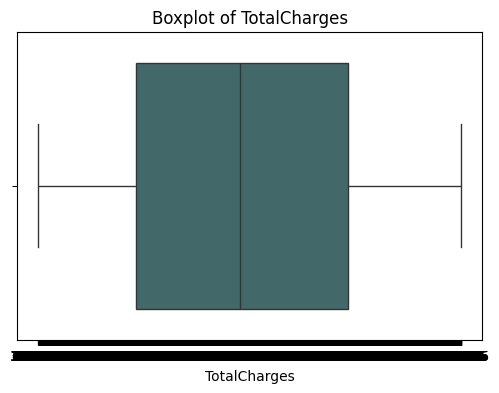

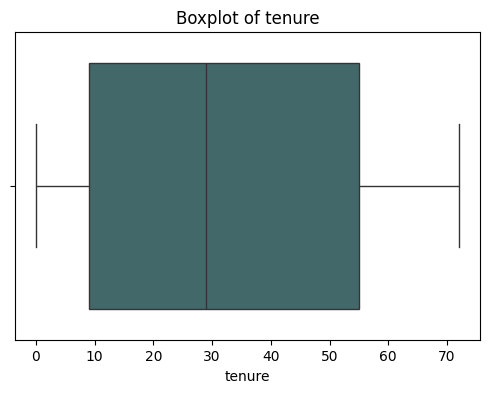

In [11]:
# Boxplot for numeric columns
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col],color='#3c6e71')
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:
# Value Counts for All Columns
for column in df.columns:
    print(f"Value Counts for '{column}':")
    print(df[column].value_counts(dropna=False))  # Shows NaNs if any
    print("="*60)

Value Counts for 'customerID':
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
Value Counts for 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
Value Counts for 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Value Counts for 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Value Counts for 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Value Counts for 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
Value Counts for 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Value Counts for 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No p

In [13]:
#Unique Values for All columns
for column in df.columns:
    print(f"Unique Values in '{column}':")
    print(df[column].unique())
    print("="*60)

Unique Values in 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Values in 'gender':
['Female' 'Male']
Unique Values in 'SeniorCitizen':
[0 1]
Unique Values in 'Partner':
['Yes' 'No']
Unique Values in 'Dependents':
['No' 'Yes']
Unique Values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique Values in 'PhoneService':
['No' 'Yes']
Unique Values in 'MultipleLines':
['No phone service' 'No' 'Yes']
Unique Values in 'InternetService':
['DSL' 'Fiber optic' 'No']
Unique Values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']
Unique Values in 'OnlineBackup':
['Yes' 'No' 'No internet service']
Unique Values in 'DeviceProtection':
['No' 'Yes' 'No internet service']
Unique Values in 'TechSupport':
['No' 'Yes' 'No internet service']
Unique Valu

* **CustomerID**:This column is not a categroical column , unique identifier and does not provide any insight for analysis .

* **Binary columns** [gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn]

## **Data Distributions & Summary**

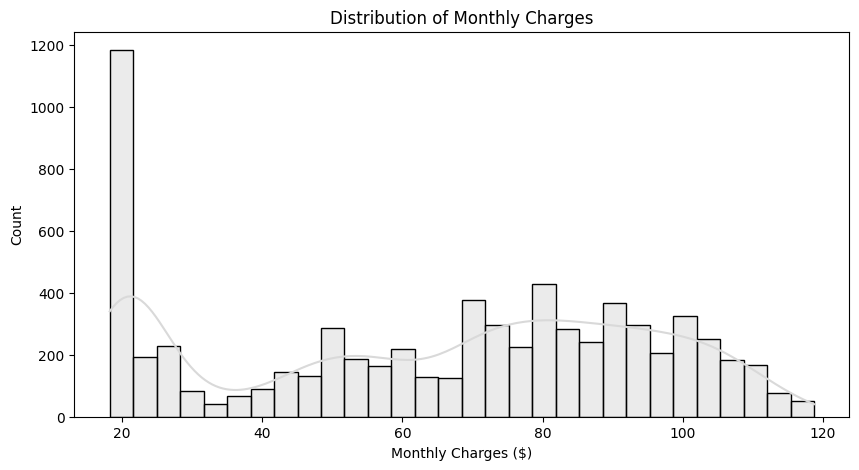

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='#d9d9d9')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

### Insights from Monthly Charges Distribution:
 - If churn is higher among low-paying customers (<$30), they might not find enough value in the service.
   → Solution: Improve service offerings or provide better retention offers.
  
 - If churn is higher in the mid-range ($30-$70), customers may be exploring competitors.
   → Solution: Analyze competitors and introduce competitive pricing or features.
   
 - If churn is higher in the high-paying segment (>$70), customers may feel the service is too expensive.
   → Solution: Offer premium benefits, loyalty programs, or personalized discounts.

In [15]:
bins=[0,30,70,df['MonthlyCharges'].max()]
labels=['Low','Mid','High']
df['MonthlyCharges_Category']=pd.cut(df['MonthlyCharges'],bins=bins,labels=labels)
churn_rate=df.groupby('MonthlyCharges_Category')['Churn'].value_counts(normalize=True).unstack()
churn_rate

Churn,No,Yes
MonthlyCharges_Category,,
Low,0.901996,0.098004
Mid,0.756502,0.243498
High,0.646386,0.353614


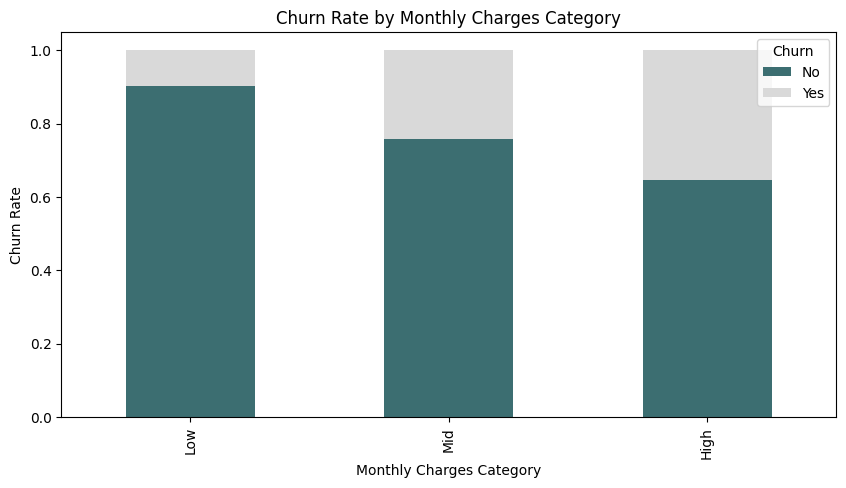

In [16]:
churn_rate.plot(kind='bar',stacked=True,figsize=(10,5),color=['#3c6e71','#d9d9d9'])
plt.title("Churn Rate by Monthly Charges Category")
plt.xlabel("Monthly Charges Category")
plt.ylabel("Churn Rate")
plt.legend(title="Churn")
plt.show()

### Insights from Churn Rate by Monthly Charges Category:
 - High-paying customers show the highest churn rate, suggesting they may find the service too expensive or not worth the cost.

#### Recommendations:
 - For high-paying customers, introduce loyalty programs, discounts, or premium benefits to retain them.

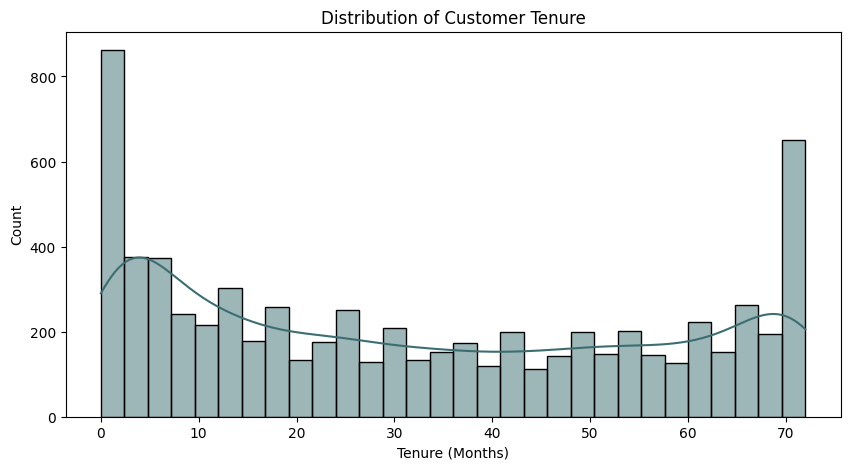

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=30, kde=True, color='#3c6e71')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

###   Insights from Customer Tenure Distribution:
 - A significant number of customers leave within the first few months, indicating early churn issues.


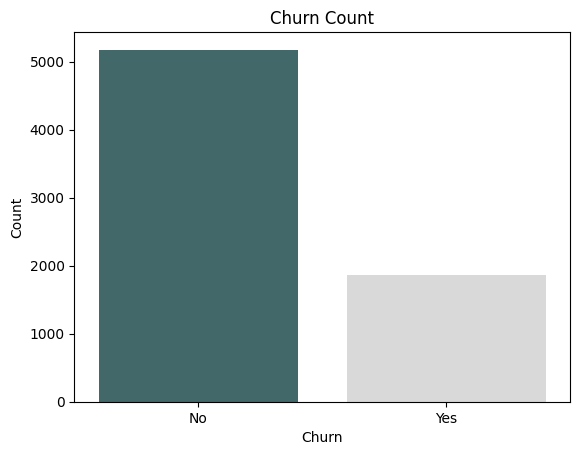

In [18]:
# Churn count
sns.countplot(x='Churn', data=df, palette=['#3c6e71', '#d9d9d9'])
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

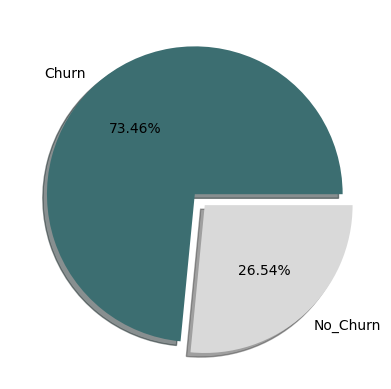

In [19]:
plt.pie(x=df["Churn"].value_counts().values,labels=['Churn','No_Churn'],autopct='%.02f%%',explode=[0, 0.1],
    shadow=True,colors=['#3c6e71','#d9d9d9'])
plt.show()

* Approximately 27% of users have left the company.
* We will try to discover why these customers left the company.

###  **Analyze Categorical Features**

In [20]:
categorical_cols = ['InternetService', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod','PaperlessBilling',]


for col in categorical_cols:
    counts = df[col].value_counts(normalize=True) * 100
    counts = counts.round(2).astype(str) + "%"

    print(f"\n{col} Distribution:\n{counts}\n")

    # Generate a dynamic insight based on the highest category
    most_common = counts.idxmax()
    print(f"=============== Most customers prefer '{most_common}' {col} ===============\n")



InternetService Distribution:
InternetService
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'Fiber optic' InternetService ===============


OnlineBackup Distribution:
OnlineBackup
No                     43.84%
Yes                    34.49%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' OnlineBackup ===============


DeviceProtection Distribution:
DeviceProtection
No                     43.94%
Yes                    34.39%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' DeviceProtection ===============


TechSupport Distribution:
TechSupport
No                     49.31%
Yes                    29.02%
No internet service    21.67%
Name: proportion, dtype: object

=============== Most customers prefer 'No' TechSupport ===============


StreamingTV Distribution:
StreamingTV
No        

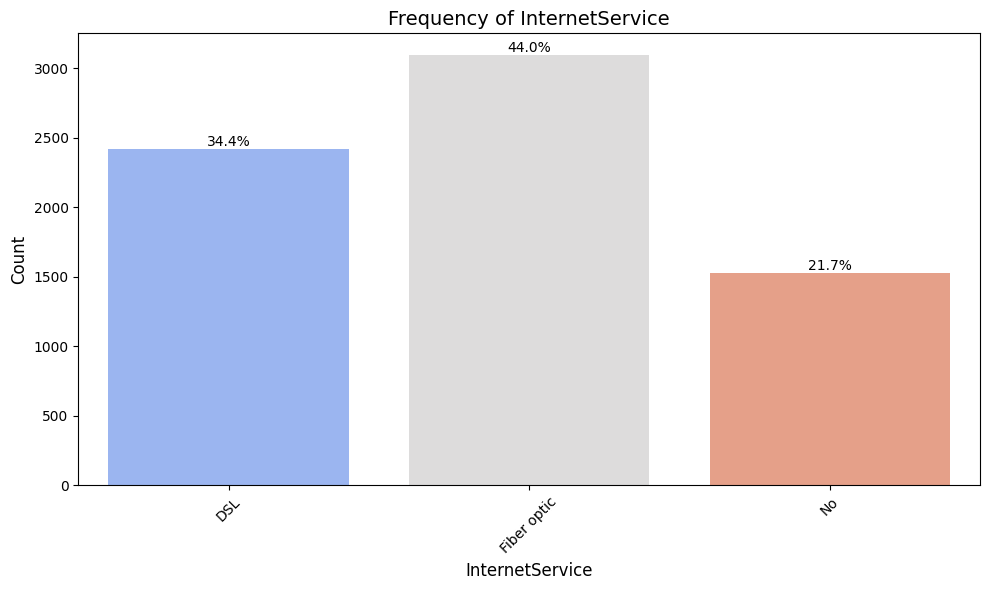

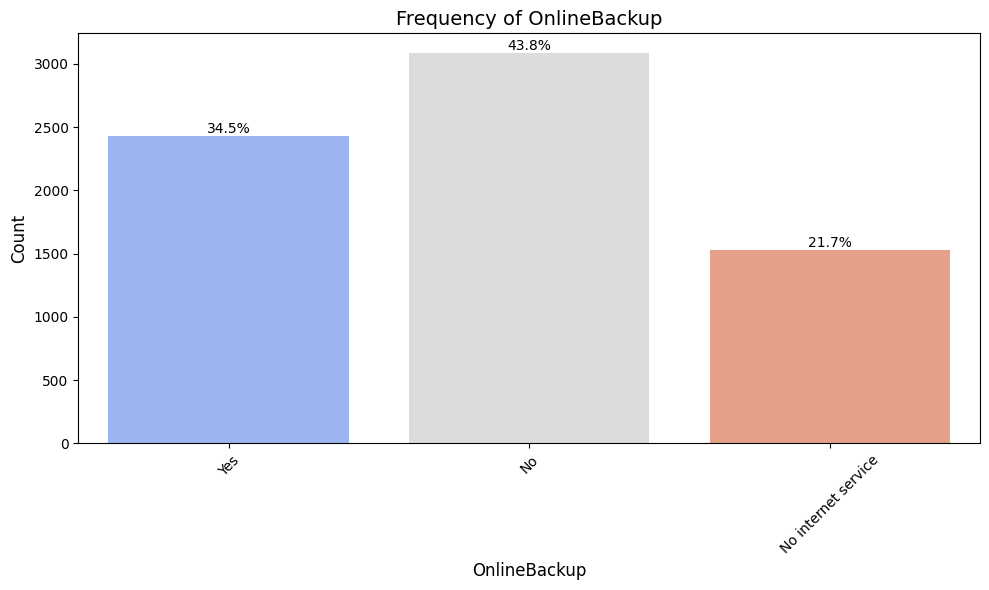

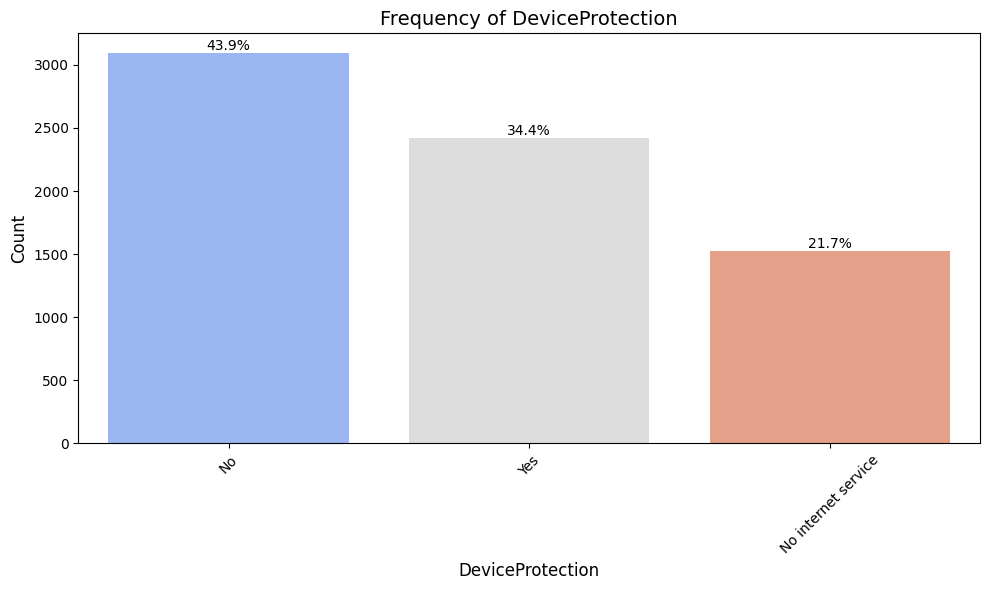

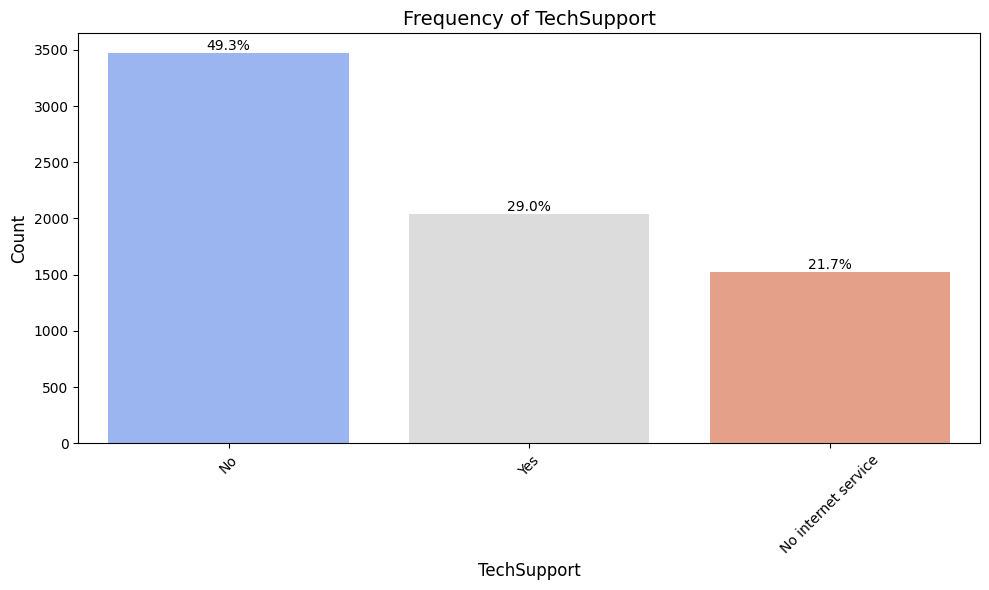

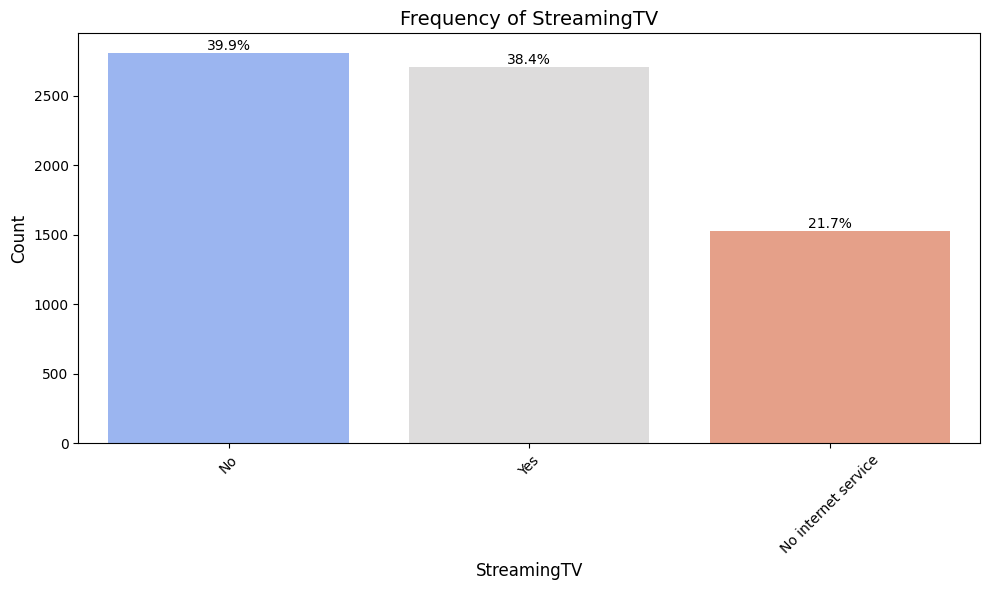

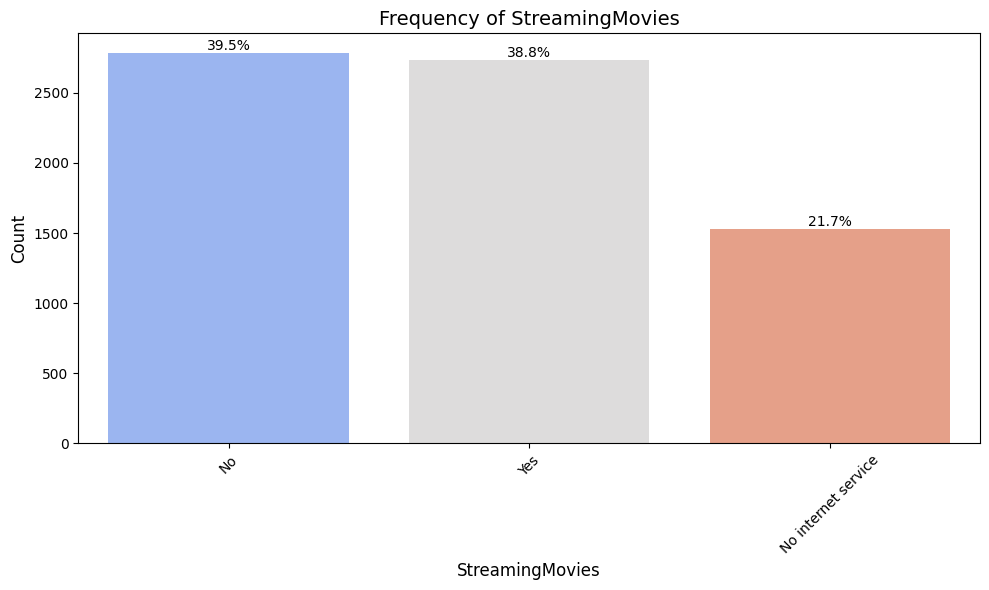

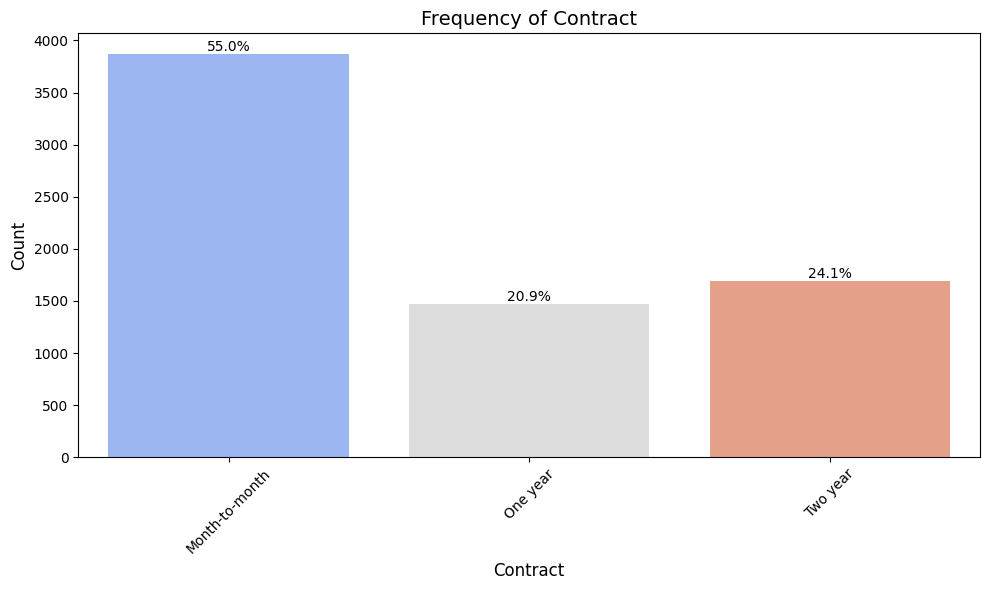

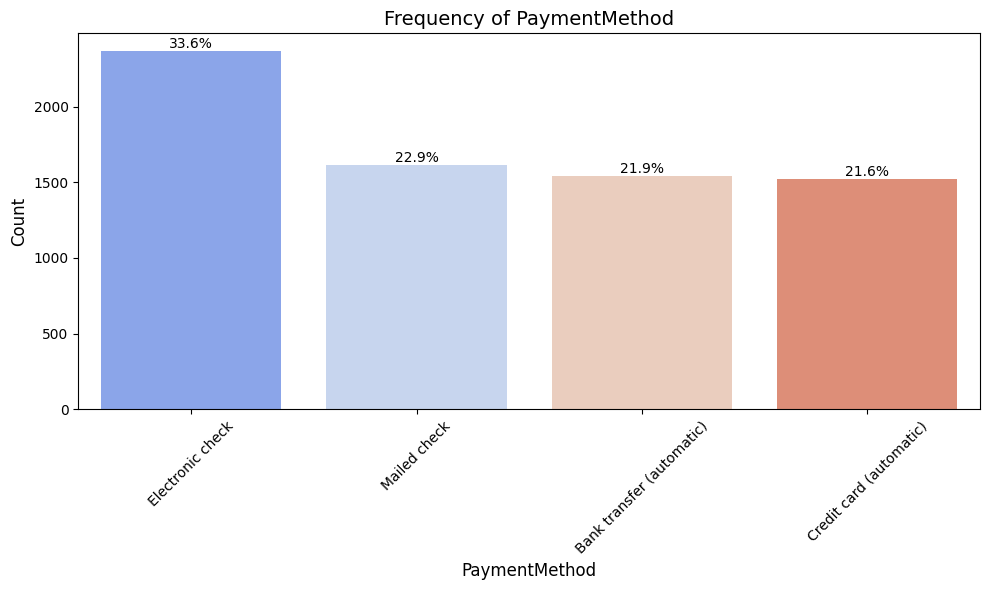

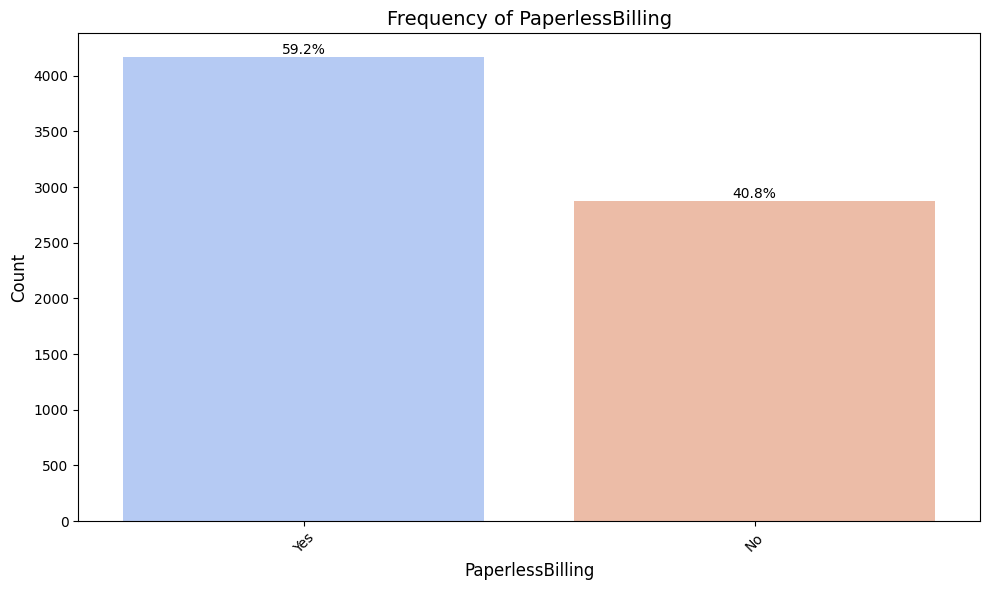

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f'Frequency of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

    # Annotate with percentage
    total = len(df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

# **Preprocessing and Feature Engineering:**

In [22]:
#Fix TotalCharges
df['TotalCharges']=df.apply(lambda x: x['MonthlyCharges'] if x['TotalCharges'] == ' ' else x['TotalCharges'], axis=1)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].isnull().sum())

0


In [23]:
#Drop irrelevant columns
df.drop(['customerID'],axis=1,inplace=True)

In [24]:
df['TotalCharges'].dtype

dtype('float64')

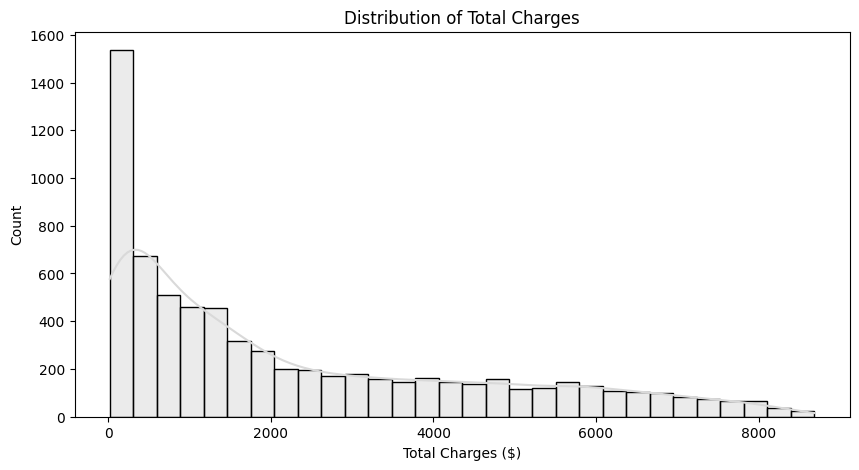

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='#d9d9d9')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Count")
plt.show()

In [26]:
categorical_cols=df.select_dtypes(include='object').columns
print("Categorical Columns: \n",categorical_cols)
print("="*60)
numerical_cols=df.select_dtypes(exclude='object').columns
print("Numerical Columns:\n ",numerical_cols)

Categorical Columns: 
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Columns:
  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'MonthlyCharges_Category'],
      dtype='object')


### **Compare Customer services with Churn**

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

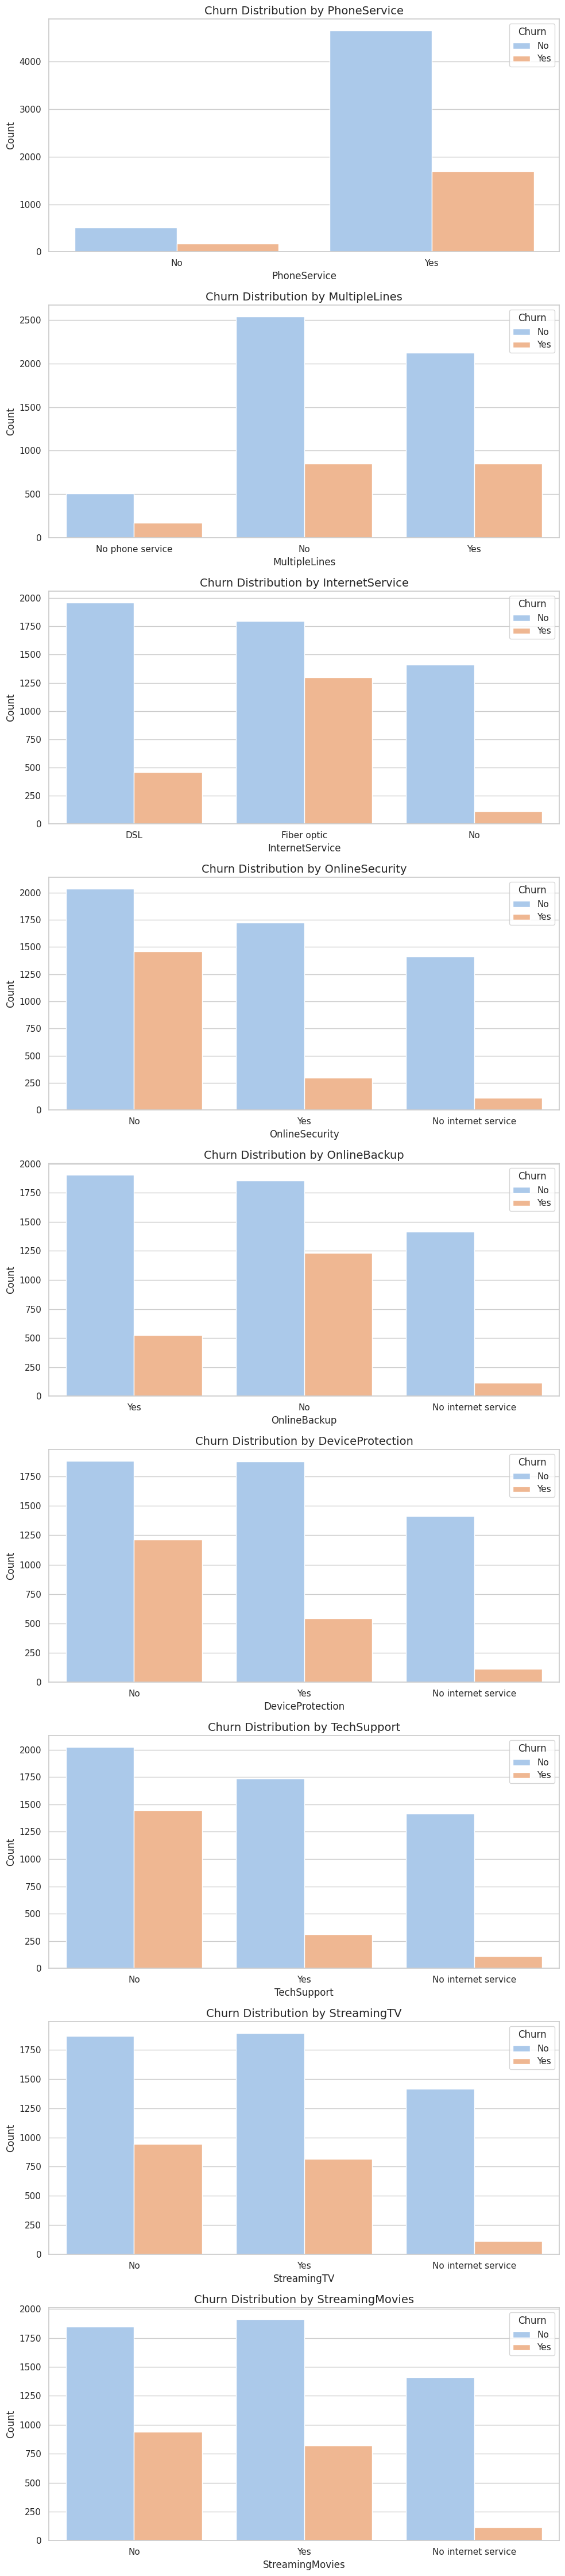

In [27]:
# List of service columns
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(services), ncols=1, figsize=(10, 5 * len(services)))

for i, service in enumerate(services):
    ax = axes[i]

    # Plot countplot with Churn hue
    sns.countplot(x=service, hue='Churn', data=df, palette='pastel', ax=ax)
    ax.set_title(f'Churn Distribution by {service}', fontsize=14)
    ax.set_xlabel(service, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### **Compare Customer Account Info with Churn**

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

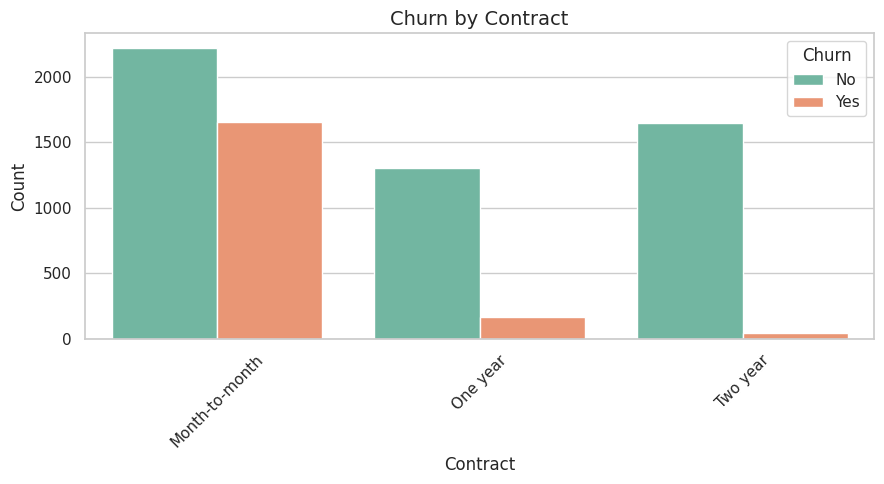

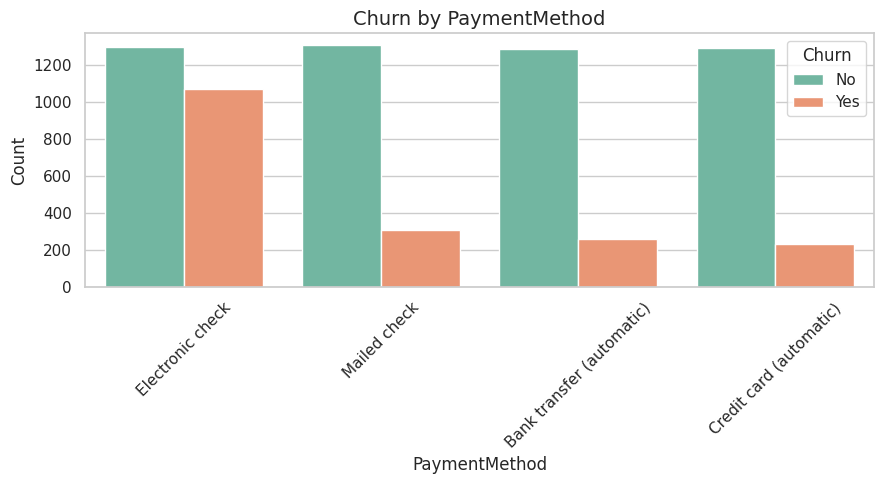

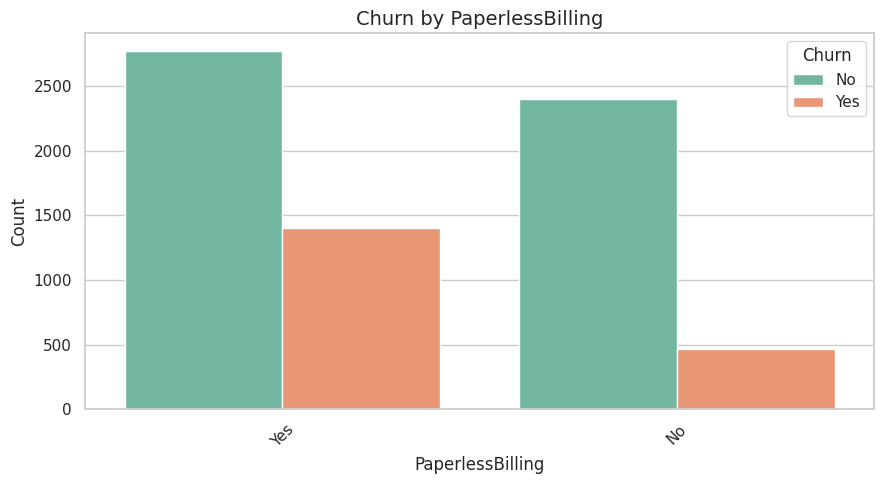

In [28]:
# Categorical features
cat_features = ['Contract', 'PaymentMethod', 'PaperlessBilling']
# Plot categorical features vs Churn
for col in cat_features:
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Churn by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

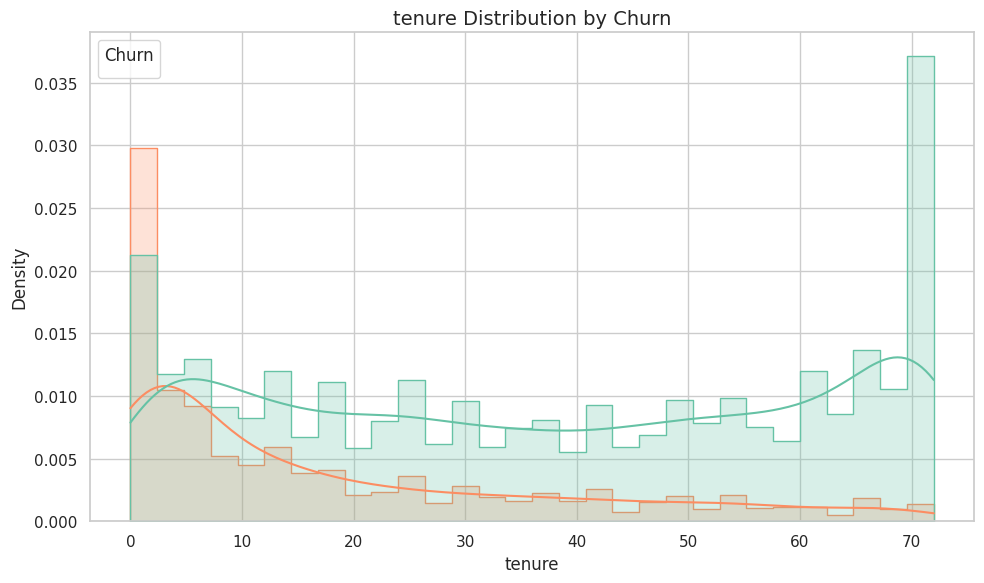

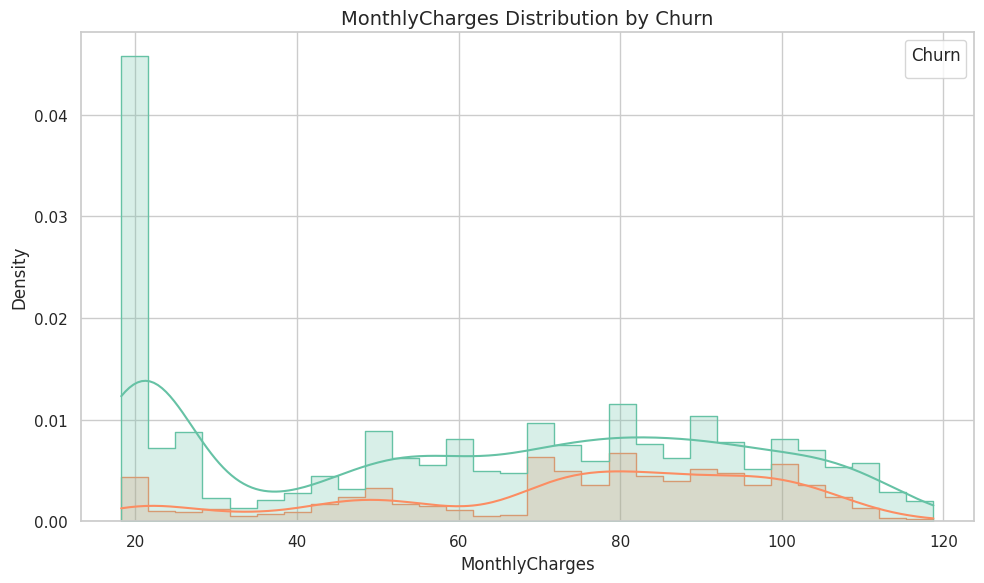

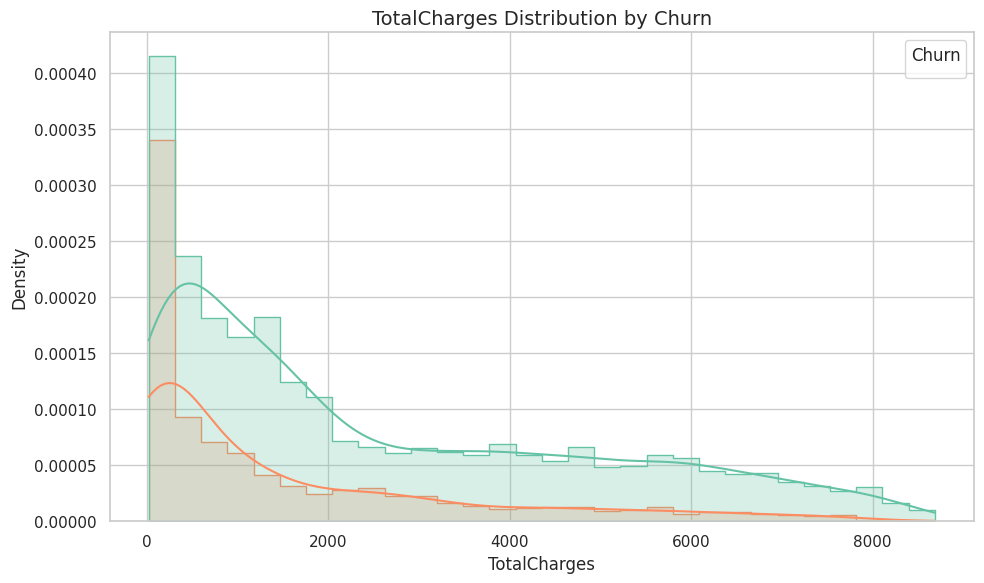

In [29]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='Set2', element='step', stat='density')
    plt.title(f'{col} Distribution by Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

### Compare Demographic Features vs Churn

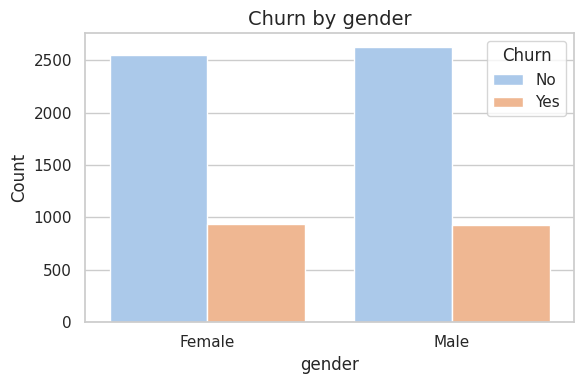

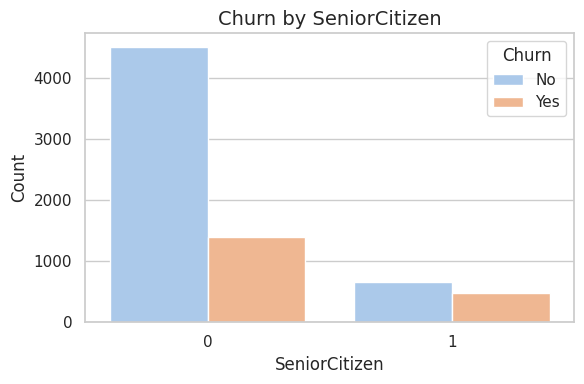

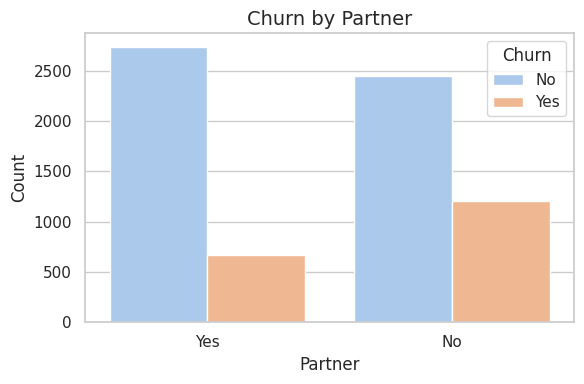

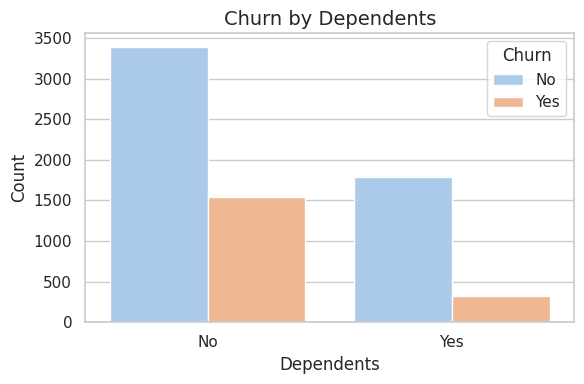

In [30]:
# Demographic columns to compare
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Plot each demographic feature vs churn
for col in demographic_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    plt.title(f'Churn by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

In [31]:
# Columns where  want to replace service-specific 'No' values
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'MultipleLines']

# Replace 'No internet service' and 'No phone service' with 'No'
df[replace_cols] = df[replace_cols].replace({'No internet service': 'No',
                                              'No phone service': 'No'})

In [32]:
for col in replace_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'OnlineSecurity': ['No' 'Yes']
Unique values in 'OnlineBackup': ['Yes' 'No']
Unique values in 'DeviceProtection': ['No' 'Yes']
Unique values in 'TechSupport': ['No' 'Yes']
Unique values in 'StreamingTV': ['No' 'Yes']
Unique values in 'StreamingMovies': ['No' 'Yes']
Unique values in 'MultipleLines': ['No' 'Yes']


### Feature Engineering

In [33]:
df['TotalPaid'] = df['MonthlyCharges'] * df['tenure']

In [34]:
# Create streaming services flag
df['has_streaming'] = ((df['StreamingTV'] == 'Yes') |
                          (df['StreamingMovies'] == 'Yes')).astype(int)

In [35]:
# Create security services flag
df['has_protection'] = ((df['OnlineSecurity'] == 'Yes') |
                           (df['OnlineBackup'] == 'Yes') |
                           (df['DeviceProtection'] == 'Yes') |
                           (df['TechSupport'] == 'Yes')).astype(int)

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category,TotalPaid,has_streaming,has_protection
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,29.85,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,Mid,1936.30,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Mid,107.70,0,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid,1903.50,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,High,141.40,0,0


### **Label encoding of categorical fetaures**

In [37]:
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

In [38]:
df['MonthlyCharges_Category']=df['MonthlyCharges_Category'].replace({'Low':0,'Mid':1,'High':2})

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category,TotalPaid,has_streaming,has_protection
0,0,0,1,0,1,0,0,0,0,1,...,0,1,2,29.85,29.85,0,0,29.85,0,1
1,1,0,0,0,34,1,0,0,1,0,...,1,0,3,56.95,1889.50,0,1,1936.30,0,1
2,1,0,0,0,2,1,0,0,1,1,...,0,1,3,53.85,108.15,1,1,107.70,0,1
3,1,0,0,0,45,0,0,0,1,0,...,1,0,0,42.30,1840.75,0,1,1903.50,0,1
4,0,0,0,0,2,1,0,1,0,0,...,0,1,2,70.70,151.65,1,2,141.40,0,0


### **Scaling Data**

In [40]:
#numeric features to scale
scaling_columns = ['tenure', 'MonthlyCharges', 'TotalCharges','TotalPaid']

scaler = MinMaxScaler()

# Fit and transform numeric columns
df_scaled = df.copy()
df_scaled[scaling_columns] = scaler.fit_transform(df_scaled[scaling_columns])

In [41]:
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Category,TotalPaid,has_streaming,has_protection
0,0,0,1,0,0.013889,0,0,0,0,1,...,0,1,2,0.115423,0.001275,0,0,0.003491,0,1
1,1,0,0,0,0.472222,1,0,0,1,0,...,1,0,3,0.385075,0.215867,0,1,0.226468,0,1
2,1,0,0,0,0.027778,1,0,0,1,1,...,0,1,3,0.354229,0.010310,1,1,0.012596,0,1
3,1,0,0,0,0.625000,0,0,0,1,0,...,1,0,0,0.239303,0.210241,0,1,0.222632,0,1
4,0,0,0,0,0.027778,1,0,1,0,0,...,0,1,2,0.521891,0.015330,1,2,0.016538,0,0


# **Exploratory Data Analysis (EDA)**

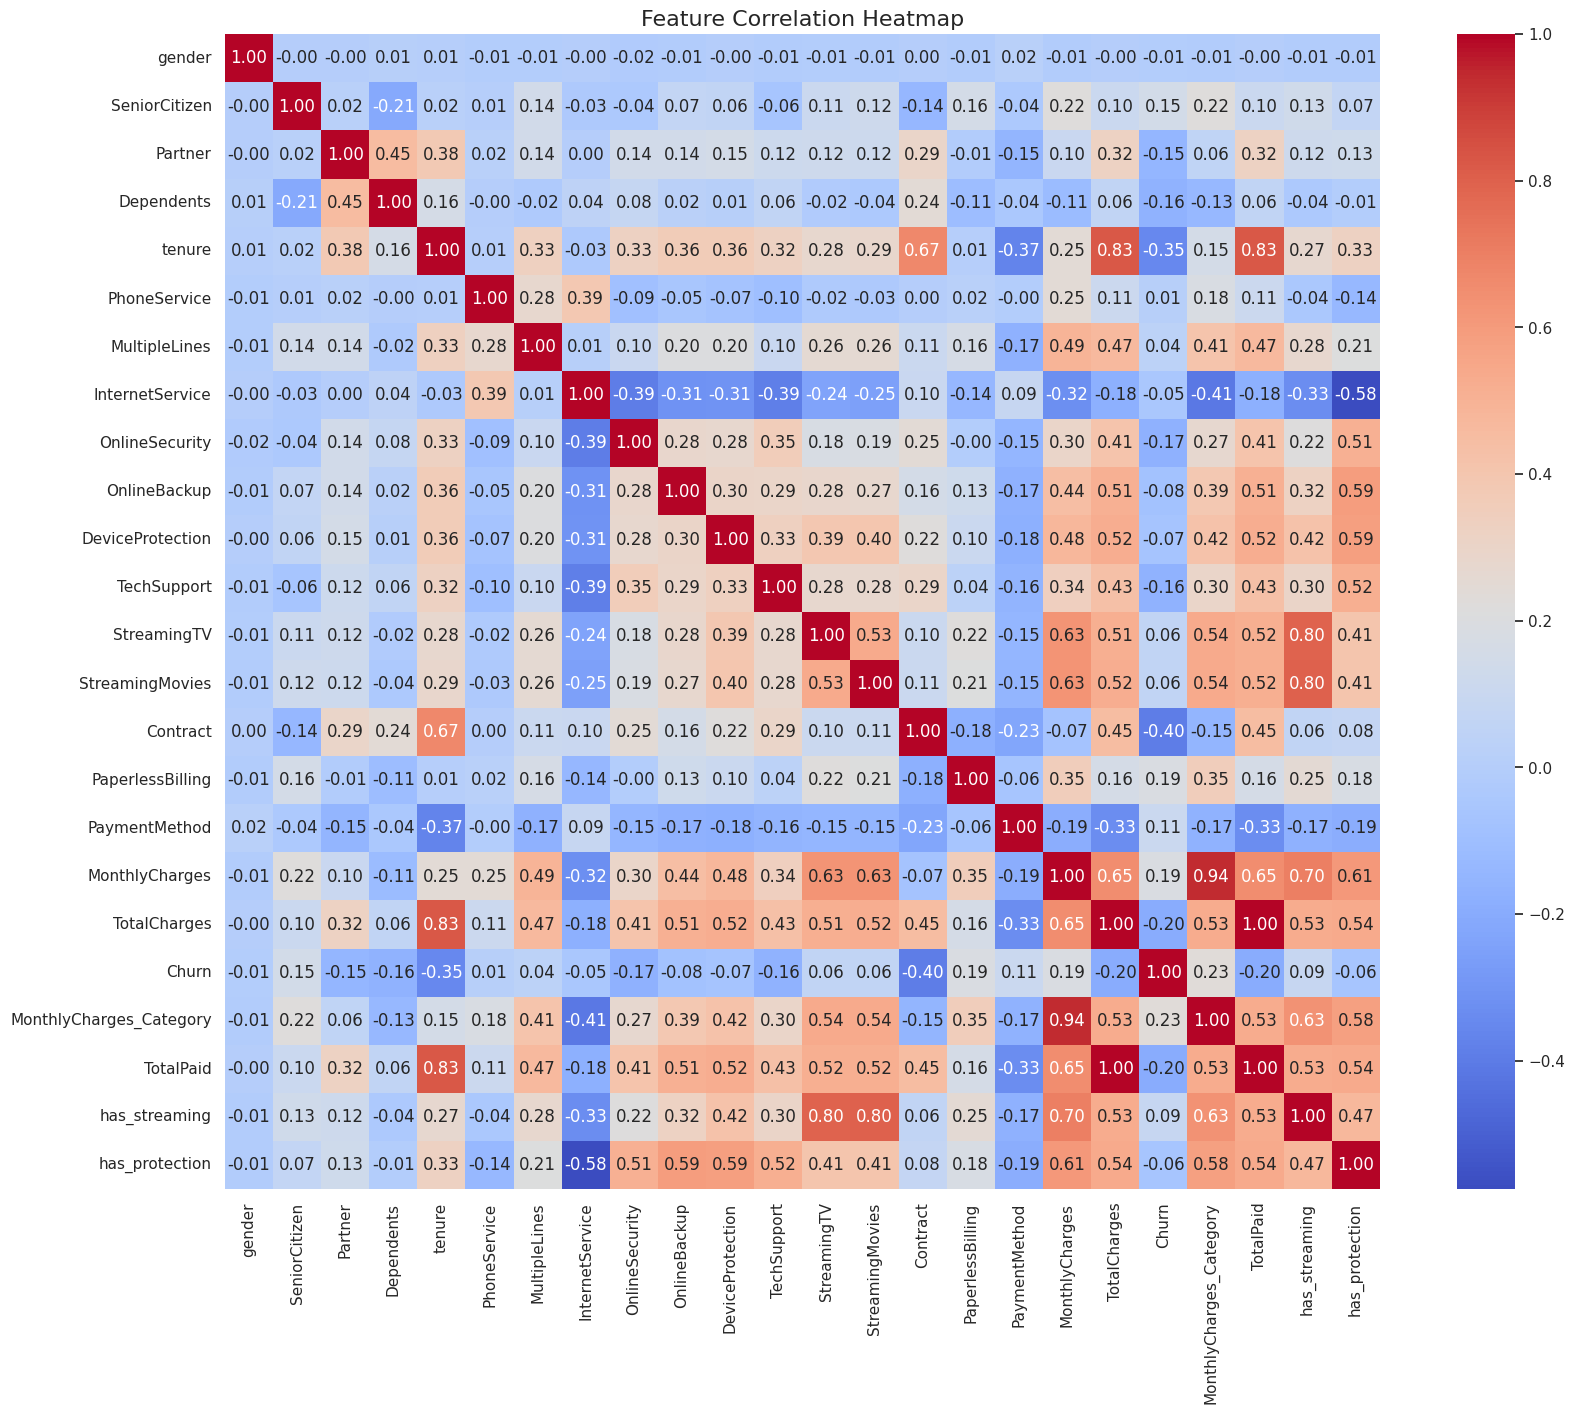

In [42]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

<Figure size 1000x600 with 0 Axes>

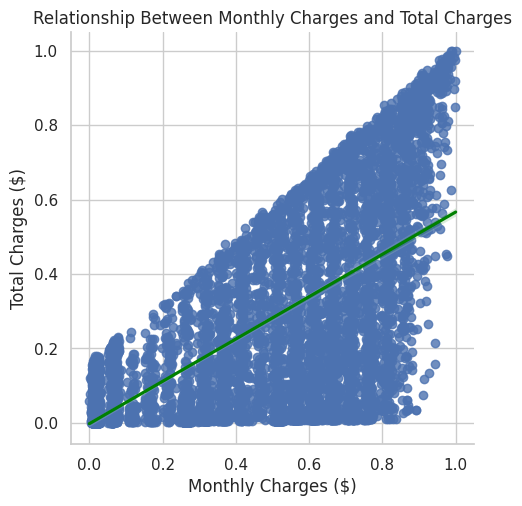

In [43]:
# Get the relation between MonthlyCharges and TotalCharges
sns.set(style="whitegrid")

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
lm_plot = sns.lmplot(data=df_scaled, x='MonthlyCharges', y='TotalCharges', fit_reg=True,line_kws={'color': 'green'})


plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.title('Relationship Between Monthly Charges and Total Charges')

# Show the plot
plt.show()

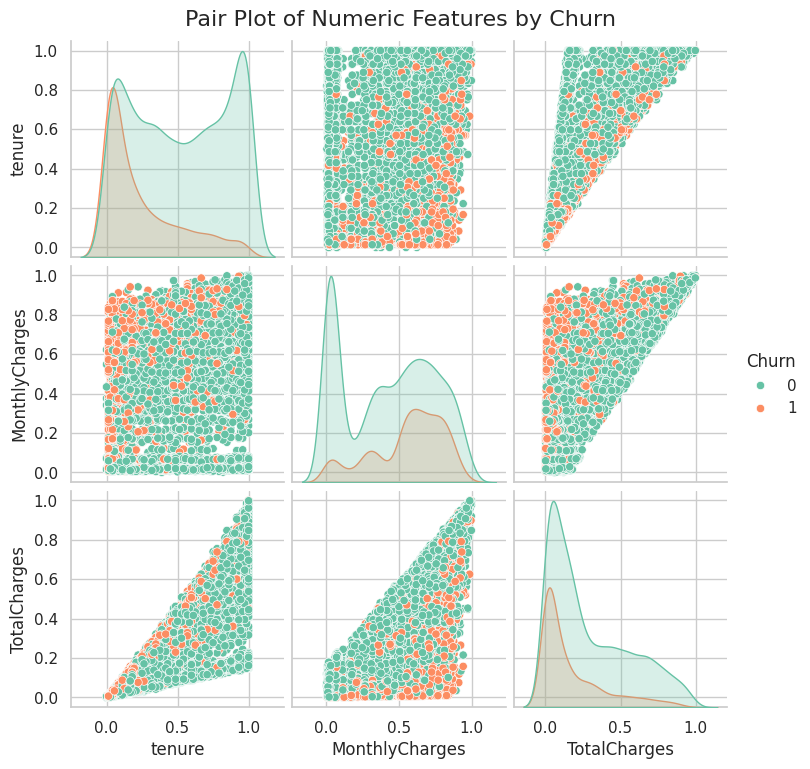

In [44]:
sns.pairplot(df_scaled, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette='Set2')
plt.suptitle("Pair Plot of Numeric Features by Churn", y=1.02, fontsize=16)
plt.show()

In [45]:
df_scaled.to_csv('cleaned_telco_churn.csv', index=False)